In [3]:
import numpy as np

In [4]:
import pandas as pd
import os

In [549]:
import statsmodels.graphics.tsaplots as tsa

In [455]:
import matplotlib.pyplot as plt

In [547]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
os.getcwd()

'C:\\Users\\jfzc\\PycharmProjects\\myQuantSampling'

In [651]:
data = pd.read_csv('Data\\c1701.csv')

In [652]:
data.head()

,barTime,mid,imbl3,imblCnt,wMidEma10,wMidEma20,imblCntThrough3,imbl,imblCnt3,imblThrough3,imblCncl,wMidEma5
0,2016-05-03T09:00:00+08:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-05-03T09:01:00+08:00,1522.5,2.225903,-0.007307,1523.491534,1523.495721,0.000926,2.225903,-0.007307,1.312098,-1.481972,1523.483424
2,2016-05-03T09:02:00+08:00,1519.5,-0.363984,-0.005990,1523.393777,1523.445711,0.002471,-0.363984,-0.005990,1.297102,1.810441,1523.296480
3,2016-05-03T09:03:00+08:00,1521.5,-0.207879,0.004037,1523.160988,1523.324001,0.001704,-0.207879,0.004037,0.965494,2.335581,1522.869715
4,2016-05-03T09:04:00+08:00,1517.5,-2.375875,-0.010506,1522.853850,1523.158881,0.000985,-2.375347,-0.010527,0.783768,3.331871,1522.335572


In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 12 columns):
barTime            9492 non-null object
mid                9491 non-null float64
imbl3              9492 non-null float64
imblCnt            9492 non-null float64
wMidEma10          9492 non-null float64
wMidEma20          9492 non-null float64
imblCntThrough3    9492 non-null float64
imbl               9492 non-null float64
imblCnt3           9492 non-null float64
imblThrough3       9492 non-null float64
imblCncl           9492 non-null float64
wMidEma5           9492 non-null float64
dtypes: float64(11), object(1)
memory usage: 890.0+ KB


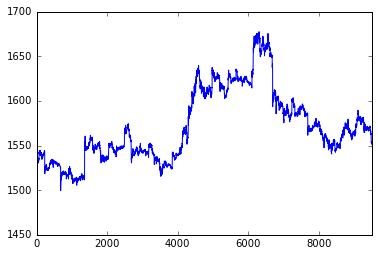

In [654]:
data.mid.plot()

In [681]:
mydata=pd.DataFrame({'barTime':pd.to_datetime(data.barTime),
                    'mid':data.mid,
                     'imbl':data.imbl,
                     'imblCncl':data.imblCncl,
                     'imblCnclN':data.imblCncl + 0.25*mydata.imbl3,
                     'imbl3':data.imbl3,
                     'imblThrough3':data.imblThrough3,
                     'imblSpread3':data.imbl3 - data.imblThrough3,
                     'imblCnt':data.imblCnt,
                     'imblCnt3':data.imblCnt3,
                     'imblCntThrough3':data.imblCntThrough3,
                     'imblCntSpread3':data.imblCnt3 - data.imblCntThrough3,
                     'wMidChange':data.wMidEma5 - data.wMidEma10,
                     'wMidChange2':data.wMidEma5 - 2* data.wMidEma10 + data.wMidEma20})

In [682]:
#day session only
def getFlattener(minutes):
    if minutes<(60+5):
        return 0
    else:
        if minutes<(60+15):
            return (minutes - (60+5))*0.1
        else:
            if minutes<(6*60 + 45):
                return 1
            else:
                if minutes<(6*60 + 55):
                    return 1 - (minutes - (6*60+45))*0.1
                else: return 0

In [659]:
#day and night
def getFlattener(minutes):
    if minutes<(60+5):
        return 0
    elif minutes<(60+15):
        return (minutes - (60+5))*0.1
    elif minutes<(6*60 + 45):
        return 1
    elif minutes<(6*60 + 55):
        return 1 - (minutes - (6*60+45))*0.1
    elif minutes<(13*60+5): 
        return 0
    elif minutes<(13*60+15):
        return (minutes - (13*60+5))*0.1
    elif minutes<(18*60 + 15):
        return 1
    elif minutes<(18*60 + 25):
        return 1 - (minutes - (18*60+15))*0.1
    else:
        return 0
annualizer = 9*60*242

In [683]:
mydata['flattener']=(60*mydata['barTime'].dt.hour+mydata['barTime'].dt.minute).apply(getFlattener)
mydata['date']=mydata.barTime.dt.date

In [684]:
dataStep = minuteDelta = 5
changeColume = 'mid'
mydata['future_change_'+str(dataStep)]=mydata[changeColume].diff(dataStep).shift(-dataStep)
mydata['timeStepCheck']=mydata.barTime.diff(dataStep).shift(-dataStep)
mydata.ix[mydata['timeStepCheck']!=pd.Timedelta(minutes = minuteDelta),'future_change_'+str(dataStep)]=NaN
mydata['future_nextChange_'+str(dataStep)]=mydata['future_change_'+str(dataStep)].shift(-1)

dataStep = minuteDelta = 1
mydata['future_change_'+str(dataStep)]=mydata[changeColume].diff(dataStep).shift(-dataStep)
mydata['timeStepCheck']=mydata.barTime.diff(dataStep).shift(-dataStep)
mydata.ix[mydata['timeStepCheck']!=pd.Timedelta(minutes = minuteDelta),'future_change_'+str(dataStep)]=NaN
mydata['future_nextChange_'+str(dataStep)]=mydata['future_change_'+str(dataStep)].shift(-1)

mydata['future_change_1'].mean()/mydata['future_change_1'].std()*sqrt(240*250)

0.56978336626033876

In [635]:
mydata.head()

,barTime,imbl,imbl3,imblCncl,imblCnt,imblCnt3,imblCntSpread3,imblCntThrough3,imblSpread3,imblThrough3,...,netpnl_imblThrough3,netpnl_imblSpread3,netpnl_imblCnt,netpnl_imblCnt3,netpnl_imblCntSpread3,netpnl_imblCntThrough3,netpnl_imblCncl,netpnl_wMidChange,netpnl_wMidChange2,netpnl_composite
0,2016-05-03 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-03 01:01:00,1.084605,1.103342,-0.234700,0.014381,0.014932,0.013956,0.000976,0.673495,0.429847,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
2,2016-05-03 01:02:00,1.219012,1.236542,-0.412802,0.019012,0.019527,0.017526,0.002002,0.629186,0.607356,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
3,2016-05-03 01:03:00,1.388185,1.404585,-0.249378,0.028051,0.028533,0.024533,0.004000,0.549461,0.855124,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
4,2016-05-03 01:04:00,0.825704,0.841047,-0.538660,0.019272,0.019723,0.017595,0.002128,0.170472,0.670575,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0


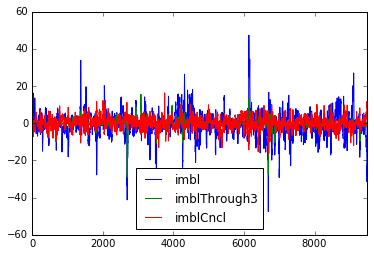

In [660]:
mydata[['imbl','imblThrough3','imblCncl']].plot()

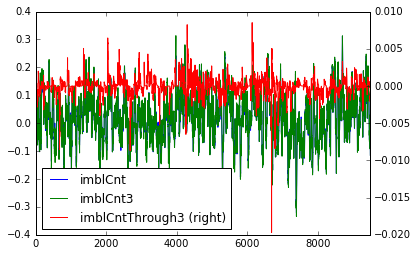

In [661]:
mydata[['imblCnt','imblCnt3','imblCntThrough3']].plot(secondary_y=['imblCntThrough3'])

In [685]:
rawFeature = mydata.columns - ['barTime','mid','flattener','date','timeStepCheck']-[col for col in mydata.columns if ('future' in col)|('feature' in col)|(('pnl' in col))]
quan=0.9
for col in rawFeature:
    print(col, np.abs(mydata[col]).quantile(quan))
    mydata['feature_'+col]=tanh(mydata[col]/np.abs(mydata[col]).quantile(quan))

imbl 9.25050806316
imbl3 9.40510689082
imblCncl 5.16373493762
imblCnclN 4.23326350235
imblCnt 0.134065976053
imblCnt3 0.141639210465
imblCntSpread3 0.141084670822
imblCntThrough3 0.00169016989626
imblSpread3 8.44622962727
imblThrough3 1.87346155206
wMidChange 1.498391909
wMidChange2 1.105101802


C:\Users\jfzc\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [686]:
mydata[intersect1d(rawFeature,mydata.columns)].describe()

,imbl,imbl3,imblCncl,imblCnclN,imblCnt,imblCnt3,imblCntSpread3,imblCntThrough3,imblSpread3,imblThrough3,wMidChange,wMidChange2
count,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9492.000000,9.492000e+03,9492.000000,9492.000000,9492.000000,9492.000000
mean,-0.463885,-0.445075,0.191220,0.079952,0.021244,0.022481,0.022509,-2.867476e-05,-0.364565,-0.080510,0.041394,-0.078989
std,6.042452,6.172096,3.184838,2.721125,0.078220,0.082387,0.082136,1.207740e-03,5.348159,1.788354,1.053769,0.739946
min,-47.448615,-47.538610,-16.378528,-14.664858,-0.321288,-0.334206,-0.334206,-1.968445e-02,-29.966941,-29.117930,-6.563154,-5.746622
25%,-3.143383,-3.450924,-1.658390,-1.342947,-0.029918,-0.032260,-0.031885,-4.632098e-04,-3.171557,-0.347044,-0.411890,-0.360184
50%,-0.331370,-0.229156,0.202370,0.066355,0.020368,0.022532,0.022567,-1.502971e-08,-0.180083,-0.000054,0.013755,-0.019286
75%,2.306354,2.553216,2.148463,1.644539,0.071375,0.076834,0.076347,4.394162e-04,2.374022,0.219093,0.425762,0.255051
max,47.316063,47.464559,16.281036,16.553856,0.312106,0.313793,0.312910,8.517249e-03,34.861220,15.518803,9.044852,3.158455


In [687]:
featureCol=[feat for feat in mydata.columns if ('feature' in feat)]
mydata[featureCol+['future_change_5','future_nextChange_5']].corr()

,feature_imbl,feature_imbl3,feature_imblCncl,feature_imblCnclN,feature_imblCnt,feature_imblCnt3,feature_imblCntSpread3,feature_imblCntThrough3,feature_imblSpread3,feature_imblThrough3,feature_wMidChange,feature_wMidChange2,future_change_5,future_nextChange_5
feature_imbl,1.000000,0.991227,-0.529105,-0.108971,0.480821,0.467275,0.461856,0.470997,0.965300,0.506046,0.813622,-0.249336,-0.004997,0.000697
feature_imbl3,0.991227,1.000000,-0.545634,-0.125541,0.473602,0.462761,0.457362,0.467709,0.971619,0.510104,0.800564,-0.242313,-0.007738,-0.002305
feature_imblCncl,-0.529105,-0.545634,1.000000,0.878723,-0.272714,-0.267458,-0.265659,-0.151061,-0.566104,-0.153399,-0.406153,-0.035796,0.008834,0.003647
feature_imblCnclN,-0.108971,-0.125541,0.878723,1.000000,-0.079714,-0.079640,-0.080931,0.083763,-0.166999,0.106000,-0.054222,-0.171784,0.005475,-0.000806
feature_imblCnt,0.480821,0.473602,-0.272714,-0.079714,1.000000,0.995843,0.995617,0.240187,0.487791,0.149325,0.365302,-0.075808,0.000500,-0.001513
feature_imblCnt3,0.467275,0.462761,-0.267458,-0.079640,0.995843,1.000000,0.999891,0.231120,0.476354,0.142542,0.353861,-0.062769,-0.000105,-0.001927
feature_imblCntSpread3,0.461856,0.457362,-0.265659,-0.080931,0.995617,0.999891,1.000000,0.218650,0.472895,0.132326,0.348642,-0.060944,0.000090,-0.001938
feature_imblCntThrough3,0.470997,0.467709,-0.151061,0.083763,0.240187,0.231120,0.218650,1.000000,0.342849,0.756595,0.430891,-0.202341,0.003012,0.007563
feature_imblSpread3,0.965300,0.971619,-0.566104,-0.166999,0.487791,0.476354,0.472895,0.342849,1.000000,0.328115,0.776919,-0.210240,0.005603,0.008667
feature_imblThrough3,0.506046,0.510104,-0.153399,0.106000,0.149325,0.142542,0.132326,0.756595,0.328115,1.000000,0.438010,-0.250711,-0.022127,-0.017653


In [688]:
mydata['feature_composite']=(mydata['feature_imblSpread3'] 
                             - mydata['feature_imblThrough3']
                              + 2 *mydata['feature_imblCntSpread3']
                             + 2 *mydata['feature_imblCncl']
                             + mydata['feature_wMidChange'])/7

In [689]:
rawFeature = concatenate((rawFeature.values,array(['composite'])))

In [690]:
featureCol=[feat for feat in mydata.columns if ('feature' in feat)]

In [691]:
changeCol='future_change_1'
changeCol='future_nextChange_1'
#featureCol=['imbl1','imbl2','imblDepth','imblSpread','cancelImbl','vwap','mid']
#featureCol=['imbl1','imbl2','imblDepth','imblSpread','cancelImbl','vwap','mid','2mid','composite']
#featureCol=['imbl','imbl3','imblThrough3','imblSpread3','imblCnt','imblCnt3','imblCntSpread3','imblCntThrough3','imblCncl','wMidChange','wMidChange2','composite']

for col in rawFeature:
#    mydata.ix[mydata['feature_'+col]<0,'feature_'+col]=0
    mydata['pnl_'+col]=mydata['feature_'+col]*mydata[changeCol]*mydata['flattener']

In [692]:
tick= 1.0
costmultiplier = 0.5
for col in rawFeature:
    cost= np.abs((mydata['feature_'+col]*mydata['flattener']).diff())*tick*costmultiplier
    mydata['netpnl_'+col]=mydata['pnl_'+col]-cost
    dailypnl= mydata.groupby('date')['netpnl_'+col].sum()
    print(col)
    #daycount, rawpnl mean, rawpnl std, netpnl mean, netpnl std, win days ratio
    print(np.round([mydata['pnl_'+col].dropna().count()/(4*60),
                    mydata['pnl_'+col].mean()*240,
                    mydata['pnl_'+col].std()*sqrt(240),
                    mydata['netpnl_'+col].mean()*240,
                    mydata['netpnl_'+col].std()*sqrt(240),
                    len(dailypnl[dailypnl>0])/len(dailypnl)],4))

imbl
[ 38.8458   0.6038  10.0567  -7.0972  10.0821   0.0952]
imbl3
[ 38.8458   0.4689  10.0875  -7.6546  10.1183   0.0952]
imblCncl
[  3.88458000e+01  -2.54600000e-01   8.21120000e+00  -1.24428000e+01
   8.27070000e+00   2.38000000e-02]
imblCnclN
[  3.88458000e+01   1.17000000e-01   7.83470000e+00  -1.18970000e+01
   7.89830000e+00   2.38000000e-02]
imblCnt
[ 38.8458   0.8117   8.1067  -6.1495   8.1128   0.119 ]
imblCnt3
[ 38.8458   0.7507   7.9984  -6.4771   8.0052   0.119 ]
imblCntSpread3
[ 38.8458   0.7346   7.9477  -6.4958   7.9551   0.119 ]
imblCntThrough3
[ 38.8458   0.9449  10.1467  -5.125   10.1801   0.1667]
imblSpread3
[ 38.8458   1.0909   9.8539  -7.4062   9.883    0.0952]
imblThrough3
[ 38.8458  -0.72     9.3501  -4.5438   9.3767   0.0714]
wMidChange
[ 38.8458   0.6164   9.9115  -4.1978   9.9153   0.1667]
wMidChange2
[ 38.8458  -0.8573   8.3286  -4.6729   8.3347   0.2143]
composite
[ 38.8458   0.4839   3.1357  -3.082    3.1499   0.0952]


netpnl_imbl              -16.426091
netpnl_imbl3             -17.652823
netpnl_imblCncl          -35.105684
netpnl_imblCnclN         -35.148168
netpnl_imblCnt           -17.687579
netpnl_imblCnt3          -18.880191
netpnl_imblCntSpread3    -19.054053
netpnl_imblCntThrough3   -11.747450
netpnl_imblSpread3       -17.486732
netpnl_imblThrough3      -11.307583
netpnl_wMidChange         -9.878974
netpnl_wMidChange2       -13.082815
netpnl_composite         -22.831684
dtype: float64


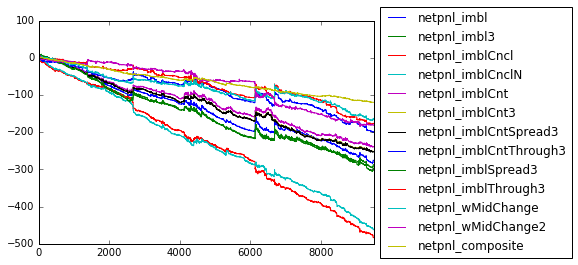

In [693]:
pnlCol=['netpnl_'+col for col in rawFeature]
print(mydata[pnlCol].mean()/mydata[pnlCol].std()*sqrt(annualizer))
mydata[pnlCol].cumsum().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

pnl_imbl               1.400939
pnl_imbl3              1.084736
pnl_imblCncl          -0.723634
pnl_imblCnclN          0.348522
pnl_imblCnt            2.336437
pnl_imblCnt3           2.190204
pnl_imblCntSpread3     2.156775
pnl_imblCntThrough3    2.172893
pnl_imblSpread3        2.583306
pnl_imblThrough3      -1.796857
pnl_wMidChange         1.451266
pnl_wMidChange2       -2.401902
pnl_composite          3.600962
dtype: float64


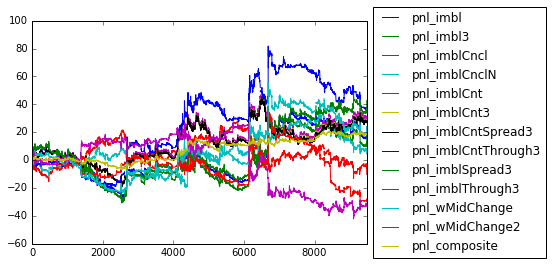

In [694]:
pnlCol=['pnl_'+col for col in rawFeature]
print(mydata[pnlCol].mean()/mydata[pnlCol].std()*sqrt(annualizer))
mydata[pnlCol].cumsum().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [645]:
mydata[['future_change_5','future_nextChange_5','future_change_1','future_nextChange_1','feature_imblCnt3','feature_imblCncl']].corr()

,future_change_5,future_nextChange_5,future_change_1,future_nextChange_1,feature_imblCnt3,feature_imblCncl
future_change_5,1.000000,0.731734,0.537083,0.393038,0.024533,0.018854
future_nextChange_5,0.731734,1.000000,-0.030111,0.537083,0.018502,0.018139
future_change_1,0.537083,-0.030111,1.000000,-0.051539,0.016202,0.006099
future_nextChange_1,0.393038,0.537083,-0.051539,1.000000,0.014522,0.001902
feature_imblCnt3,0.024533,0.018502,0.016202,0.014522,1.000000,-0.141613
feature_imblCncl,0.018854,0.018139,0.006099,0.001902,-0.141613,1.000000


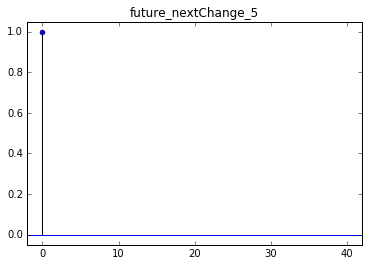

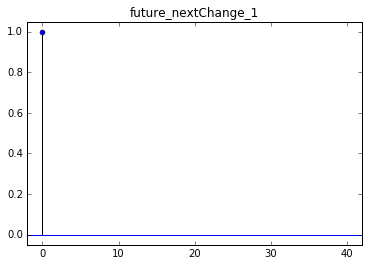

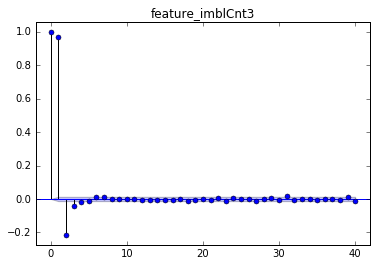

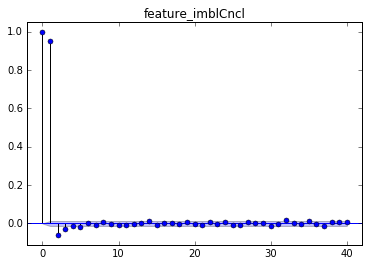

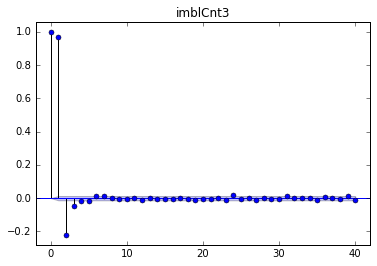

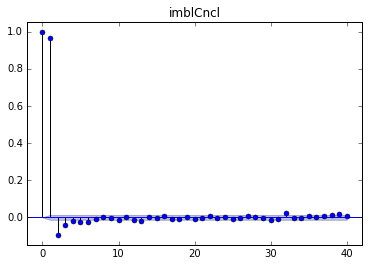

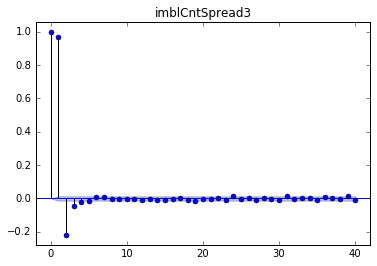

In [646]:
for col in ['future_nextChange_5','future_nextChange_1','feature_imblCnt3','feature_imblCncl','imblCnt3','imblCncl','imblCntSpread3']:
    tsa.plot_pacf(mydata[col],lags= 40)
    title(col)

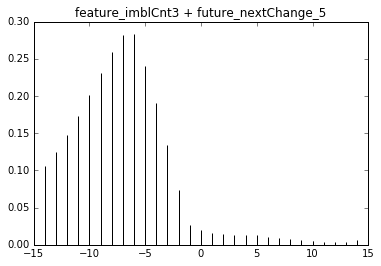

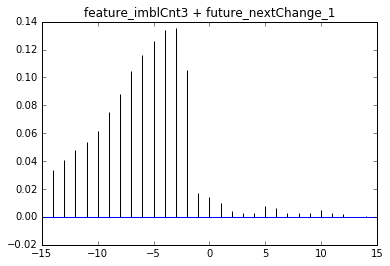

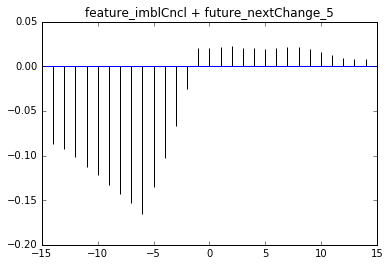

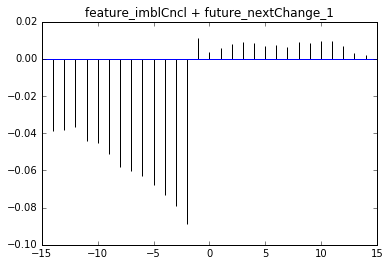

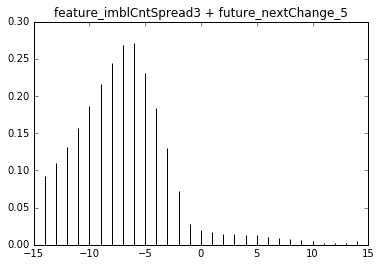

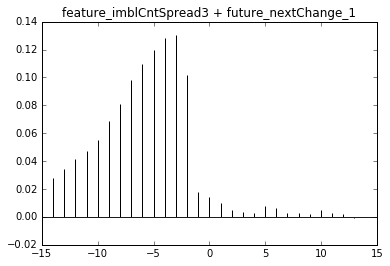

In [647]:
for col1 in ['feature_imblCnt3','feature_imblCncl','feature_imblCntSpread3']:
    for col2 in ['future_nextChange_5','future_nextChange_1']:
        xcorr(mydata.dropna()[col2], mydata.dropna()[col1].values, normed=True, usevlines=True, maxlags=15)
        title(col1+' + '+col2)
        show()

In [568]:
groupedpnl = mydata.set_index('barTime')[pnlCol].groupby(pd.TimeGrouper(freq='30Min')).mean()
groupedpnl['time']=groupedpnl.index.time
groupedpnl.dropna().groupby('time').mean()

,pnl_imbl,pnl_imbl3,pnl_imblThrough3,pnl_imblSpread3,pnl_imblCnt,pnl_imblCnt3,pnl_imblCntSpread3,pnl_imblCntThrough3,pnl_imblCncl,pnl_wMidChange,pnl_wMidChange2,pnl_composite
time,,,,,,,,,,,,
01:00:00,0.085491,0.080648,-0.034496,0.105420,0.095286,0.092563,0.093591,0.018727,-0.023926,0.036412,0.027134,0.045094
01:30:00,-0.057380,-0.060484,-0.037000,-0.051577,-0.017726,-0.018436,-0.016534,-0.035175,0.057478,-0.042491,0.006746,0.003546
02:00:00,0.087145,0.093714,0.022408,0.091561,0.086340,0.091026,0.089229,0.017932,-0.098164,0.068405,0.037995,0.017099
02:30:00,-0.003217,-0.004152,0.038191,-0.013561,0.018511,0.015980,0.012242,0.064590,-0.010724,-0.001961,-0.048321,-0.007240
03:00:00,0.046615,0.050937,-0.053691,0.062951,0.063417,0.067943,0.070912,-0.026287,-0.068625,0.012231,-0.002142,0.019064
05:30:00,0.158343,0.157114,0.095247,0.167779,0.109375,0.108562,0.097071,0.094253,-0.097605,0.193349,-0.077725,0.037830
06:00:00,-0.089957,-0.087965,-0.053297,-0.072463,-0.030043,-0.025950,-0.016245,-0.073163,0.086973,-0.089831,0.085190,0.004637
06:30:00,-0.025534,-0.023268,0.016017,-0.026609,0.002711,0.002876,0.004489,-0.031694,-0.005517,0.014294,-0.022136,-0.004341
13:00:00,-0.059439,-0.056599,-0.045688,-0.039524,-0.049473,-0.046209,-0.043185,-0.044665,-0.002363,0.016961,-0.012959,-0.009710


In [569]:
groupedpnl.dropna().groupby('time').count()

,pnl_imbl,pnl_imbl3,pnl_imblThrough3,pnl_imblSpread3,pnl_imblCnt,pnl_imblCnt3,pnl_imblCntSpread3,pnl_imblCntThrough3,pnl_imblCncl,pnl_wMidChange,pnl_wMidChange2,pnl_composite
time,,,,,,,,,,,,
01:00:00,42,42,42,42,42,42,42,42,42,42,42,42
01:30:00,42,42,42,42,42,42,42,42,42,42,42,42
02:00:00,42,42,42,42,42,42,42,42,42,42,42,42
02:30:00,42,42,42,42,42,42,42,42,42,42,42,42
03:00:00,42,42,42,42,42,42,42,42,42,42,42,42
05:30:00,42,42,42,42,42,42,42,42,42,42,42,42
06:00:00,42,42,42,42,42,42,42,42,42,42,42,42
06:30:00,42,42,42,42,42,42,42,42,42,42,42,42
13:00:00,40,40,40,40,40,40,40,40,40,40,40,40


In [648]:
groupedFeature = mydata.copy()
groupedFeature['timeRoundDown']=mydata['barTime'].apply(lambda dt: datetime.time(dt.hour,30*(dt.minute // 30)))

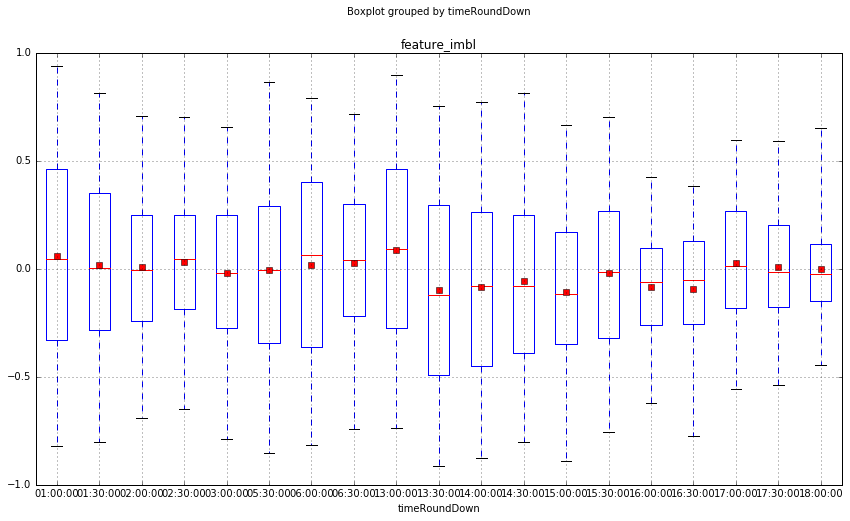

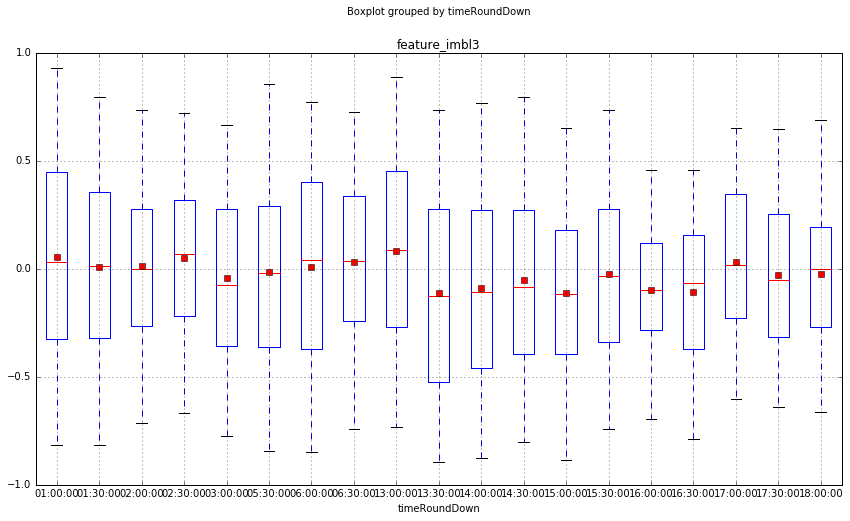

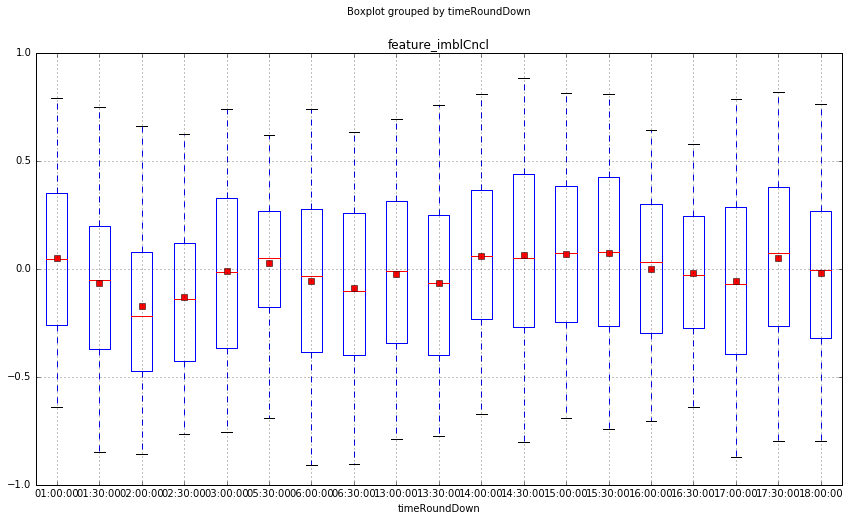

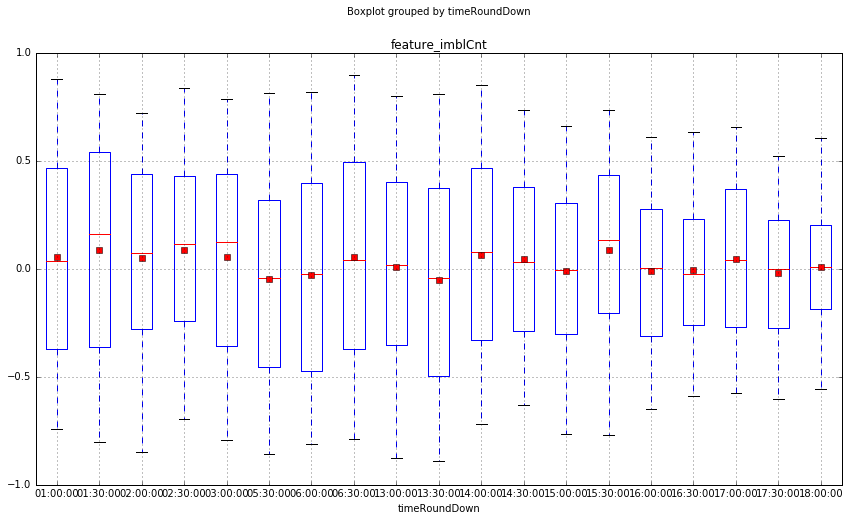

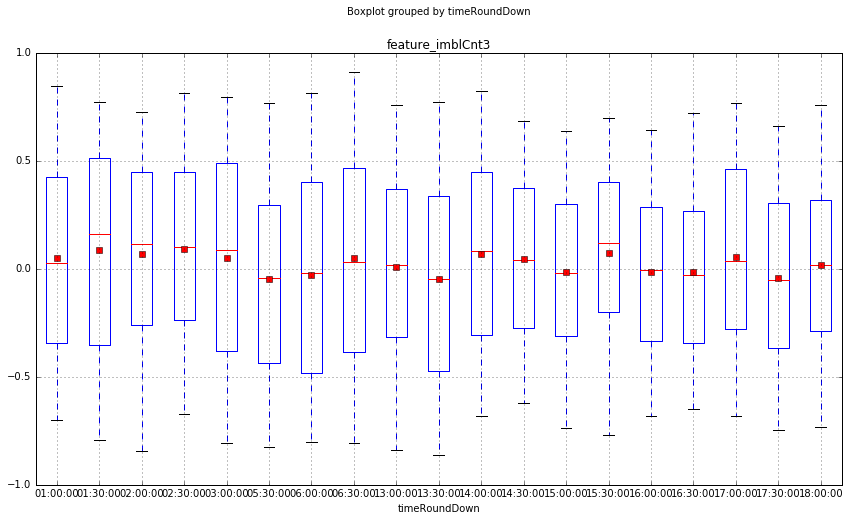

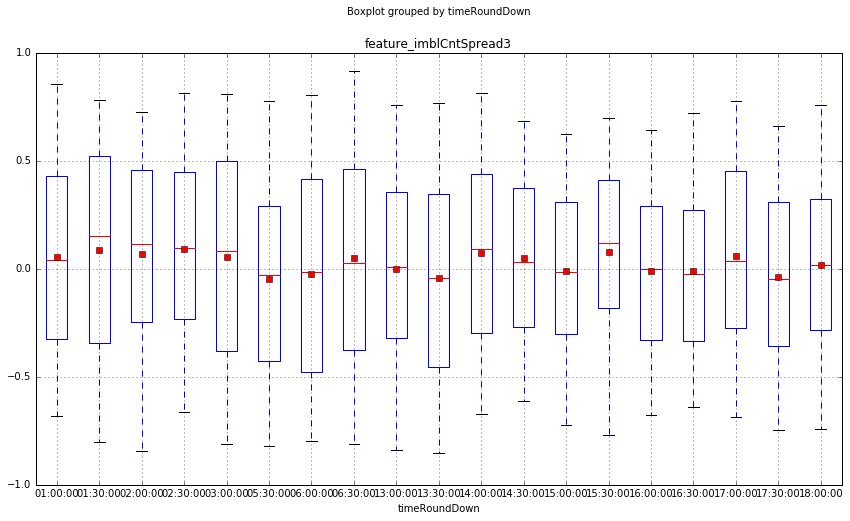

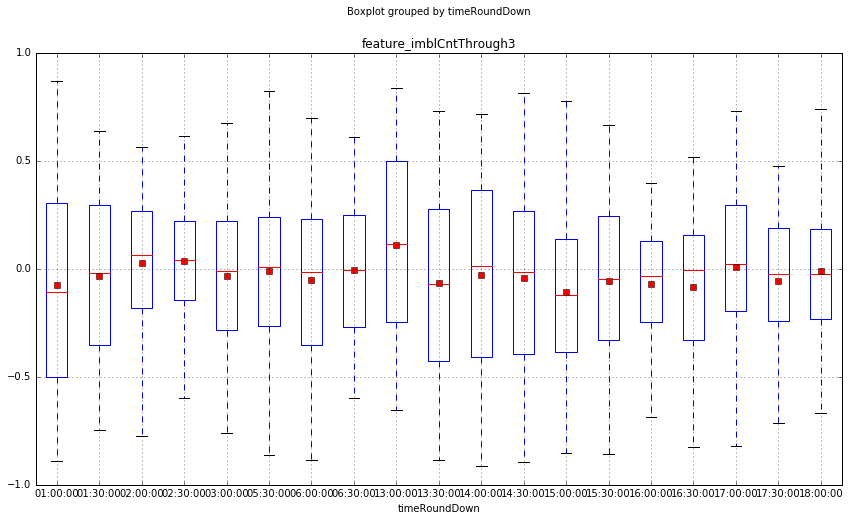

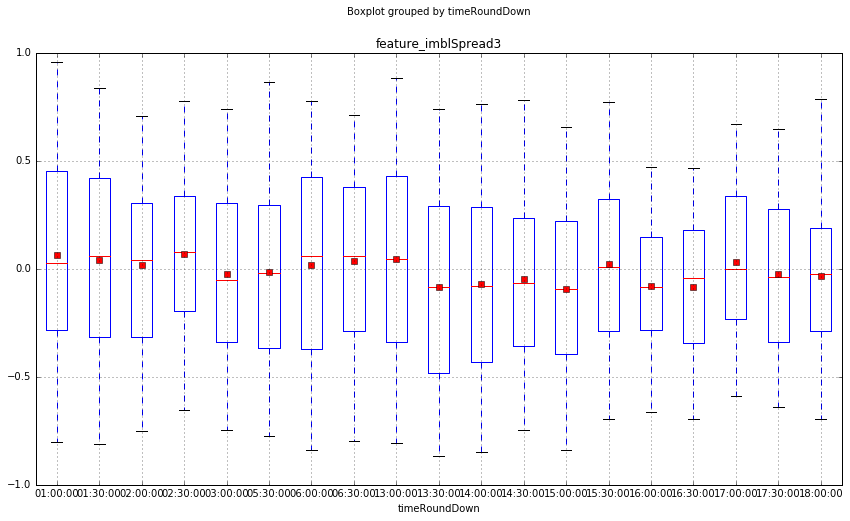

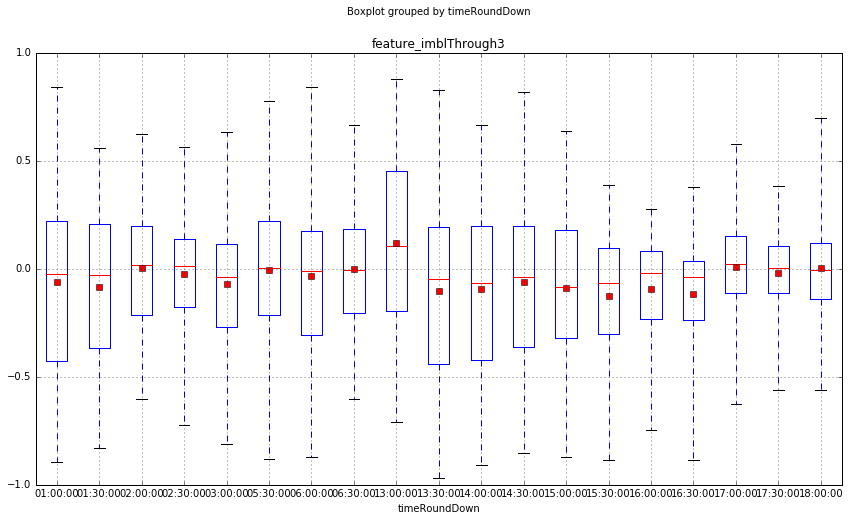

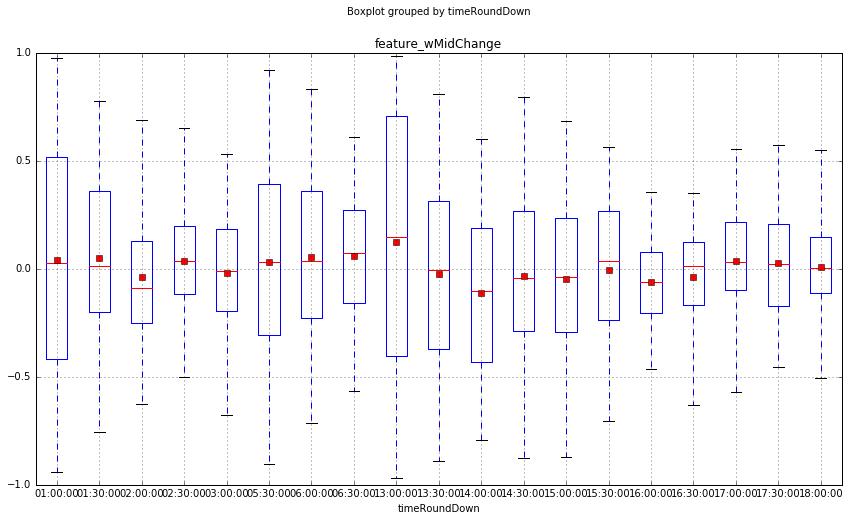

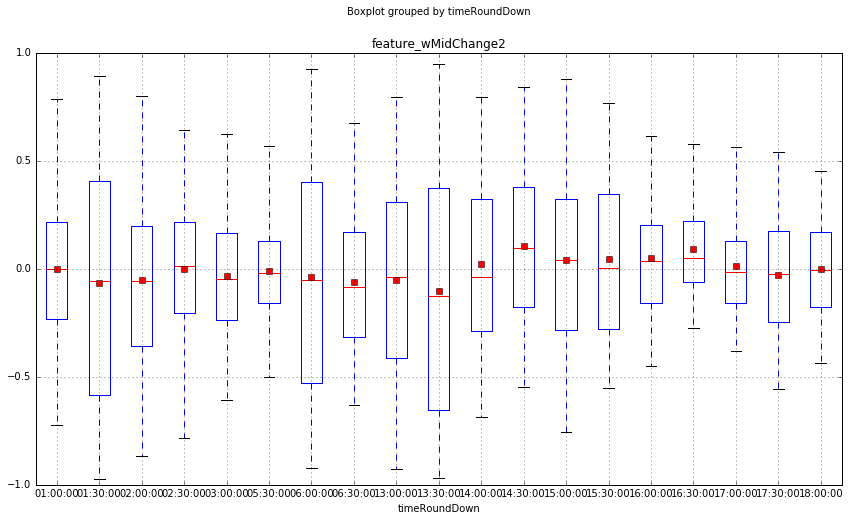

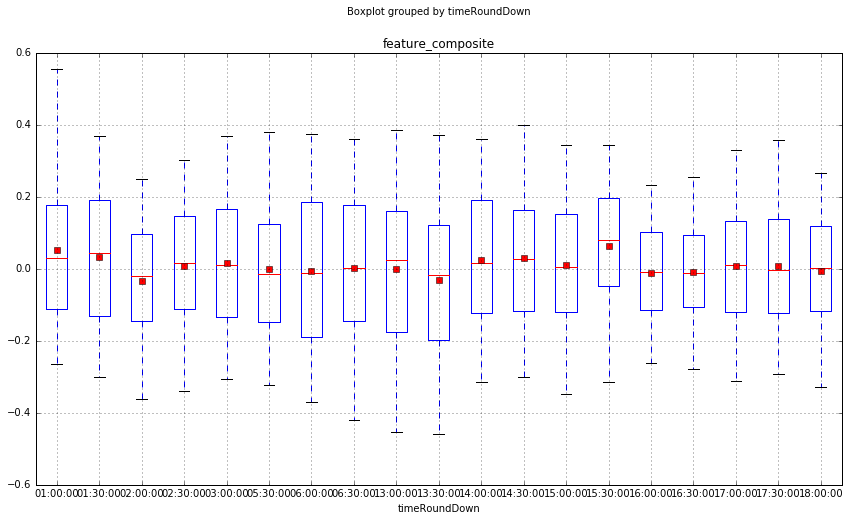

In [649]:
for col in featureCol:
    if col in groupedFeature.columns:
        groupedFeature.boxplot(column=col, by='timeRoundDown',figsize=(14, 8),showfliers=False,showmeans=True,whis=[5,95])

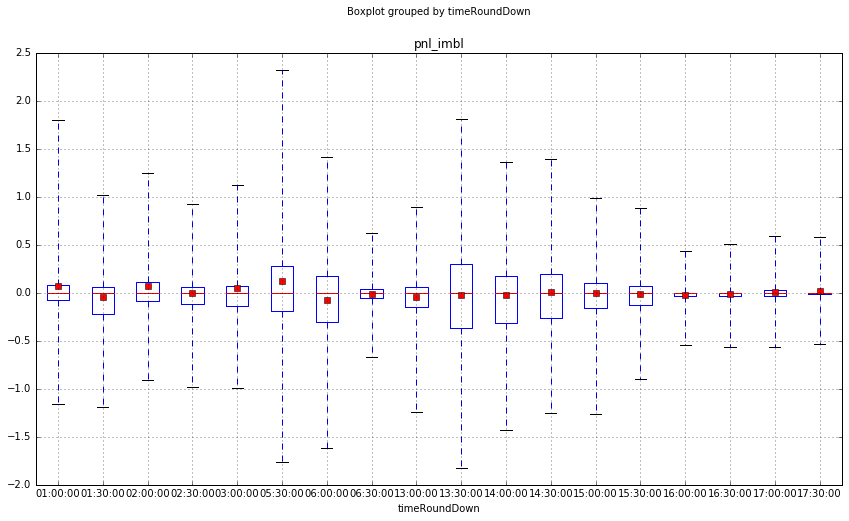

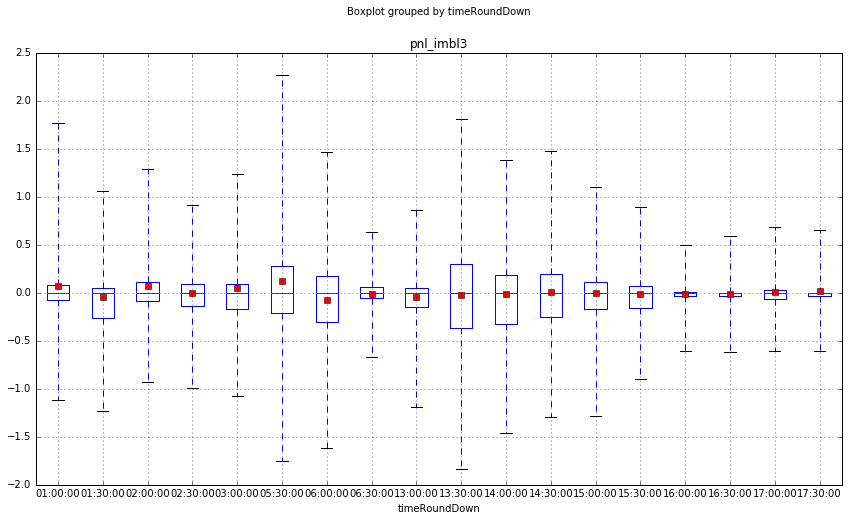

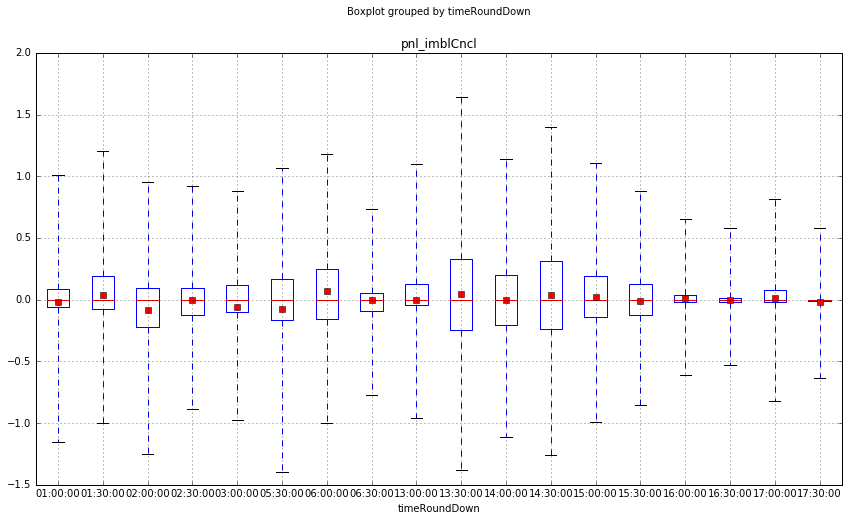

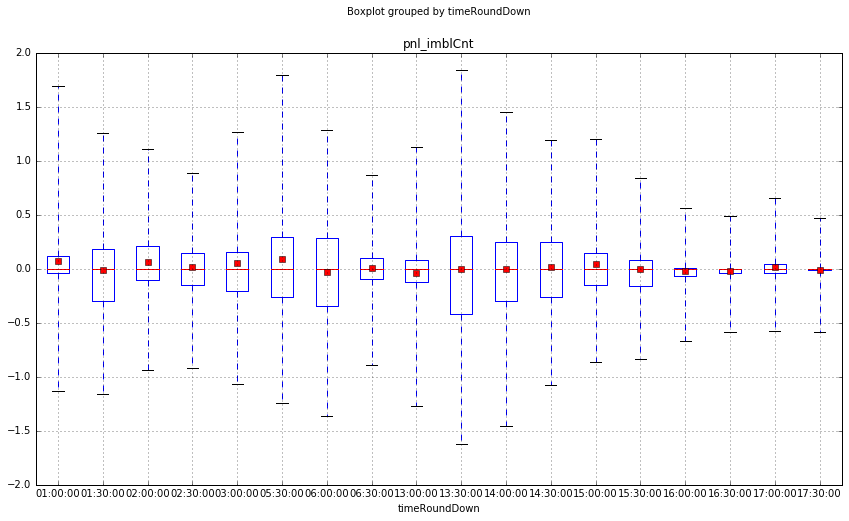

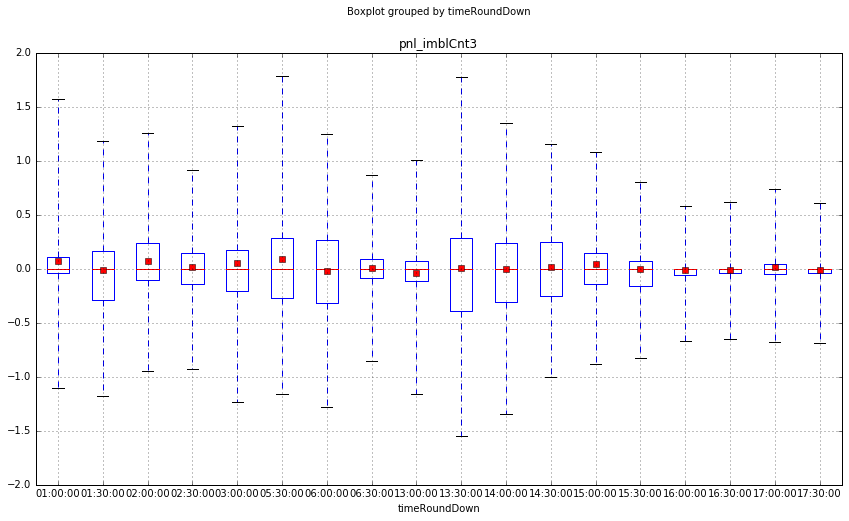

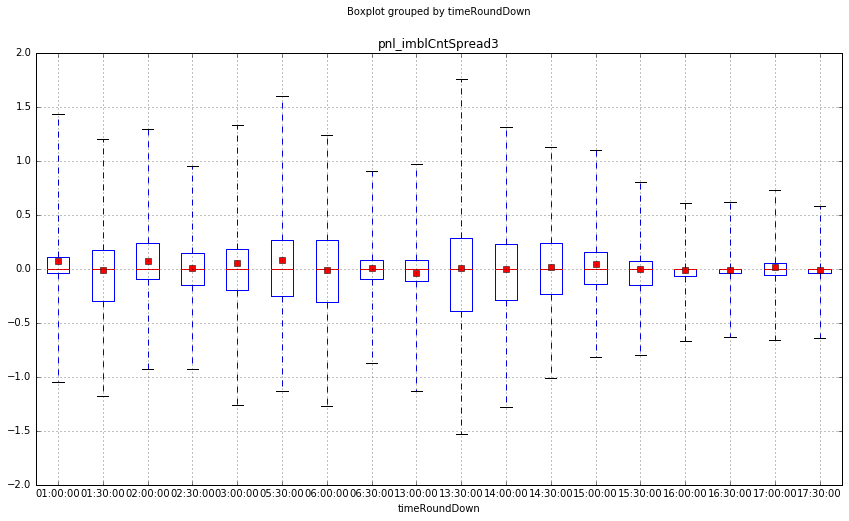

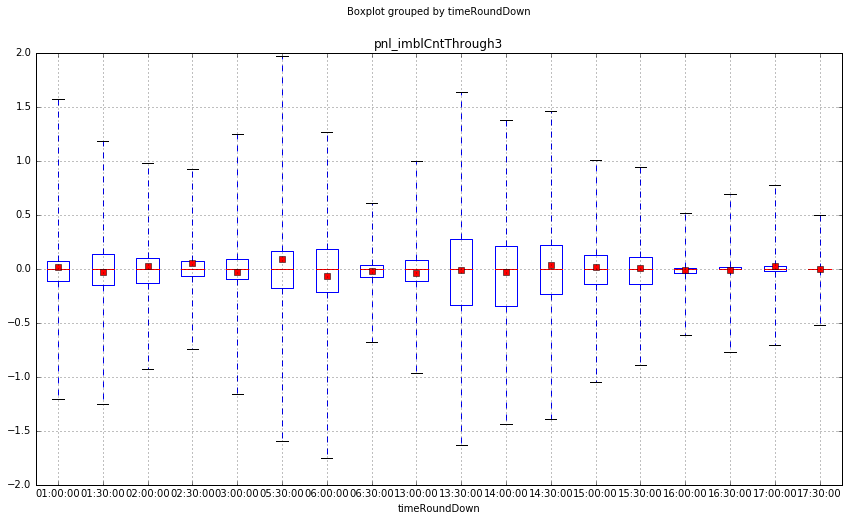

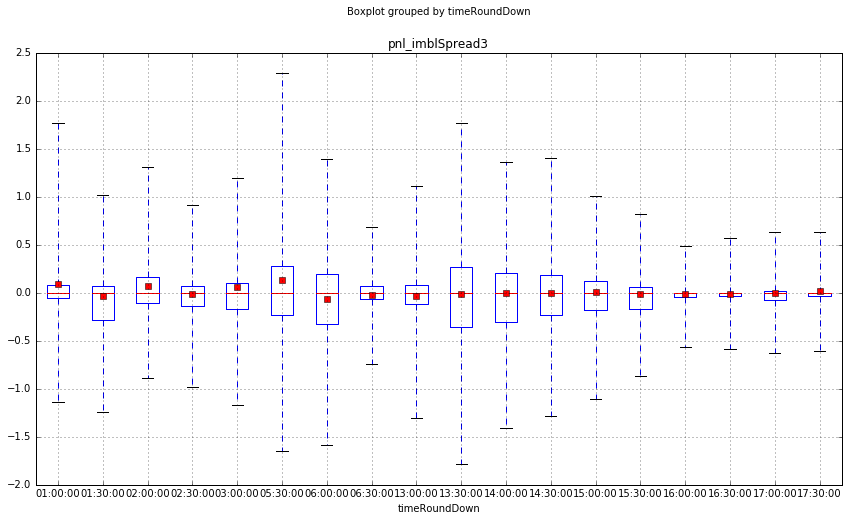

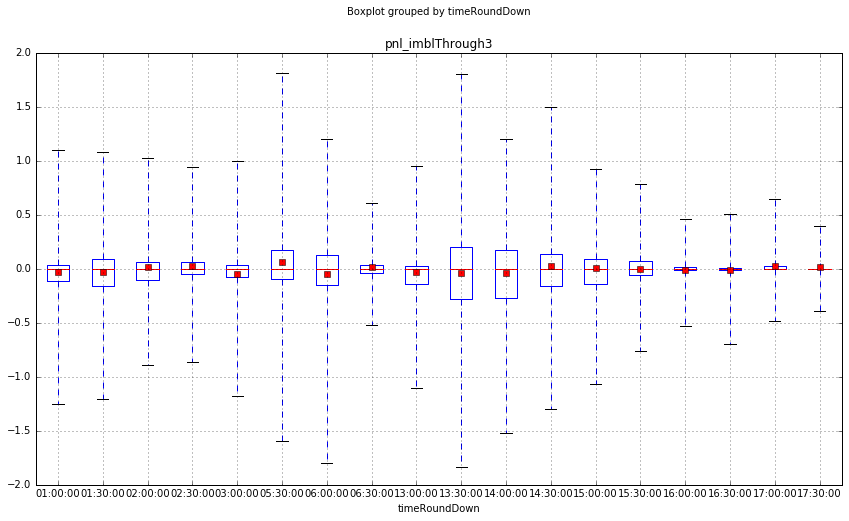

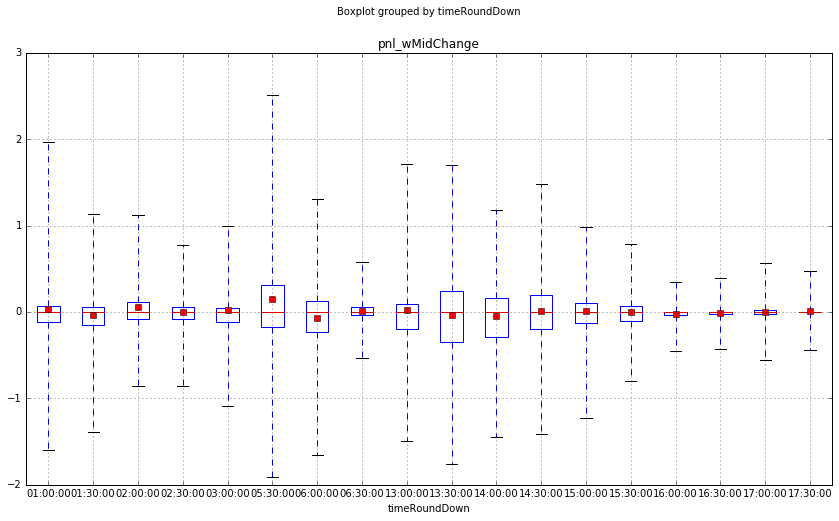

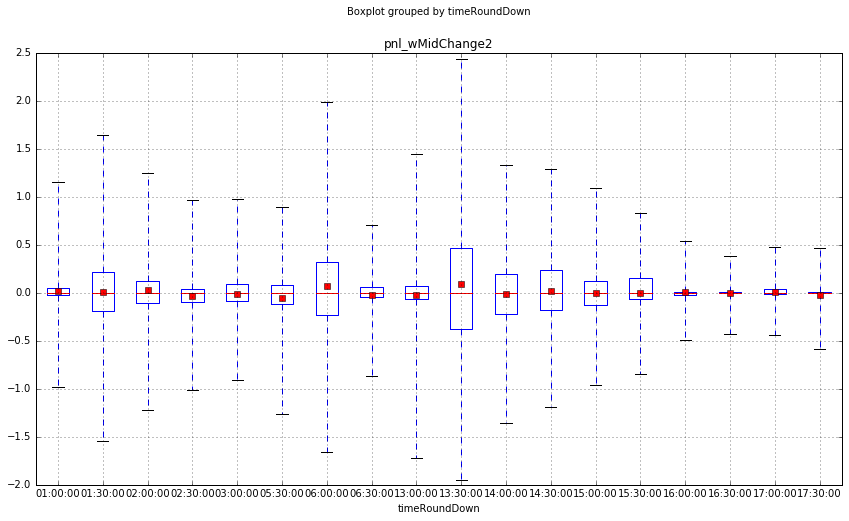

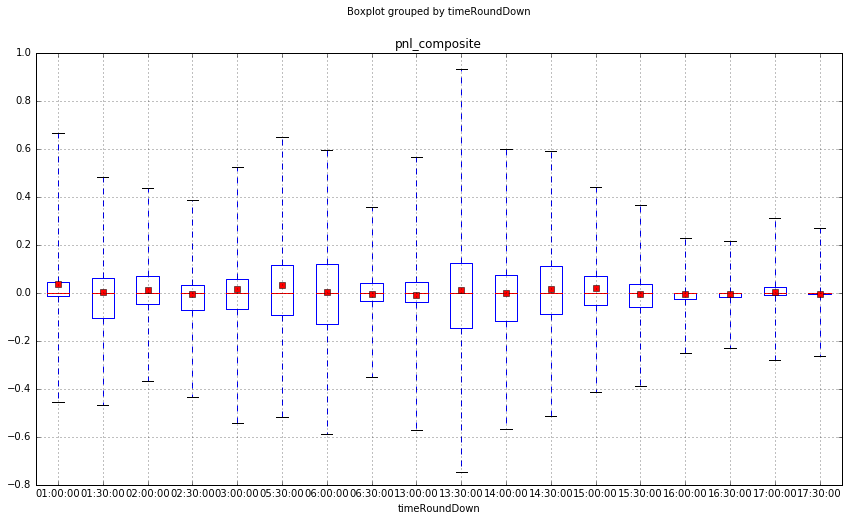

In [650]:
for col in pnlCol:
    if col in groupedFeature.columns:
        groupedFeature[groupedFeature['timeRoundDown']!=datetime.time(18,0,0)].boxplot(column=col, by='timeRoundDown',figsize=(14, 8),showfliers=False,showmeans=True,whis=[5,95])

In [577]:
temp = mydata.set_index('barTime')['2016-06-24']

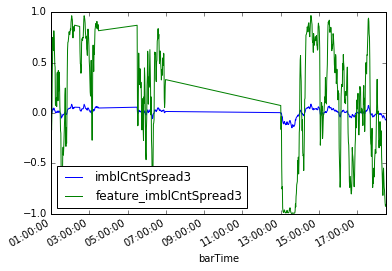

In [578]:
temp[["imblCntSpread3",'feature_imblCntSpread3']].plot()

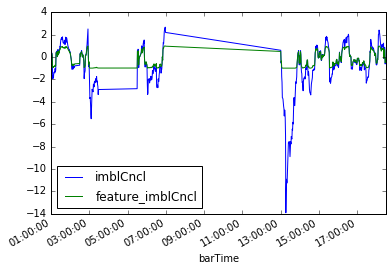

In [579]:
temp[["imblCncl",'feature_imblCncl']].plot()

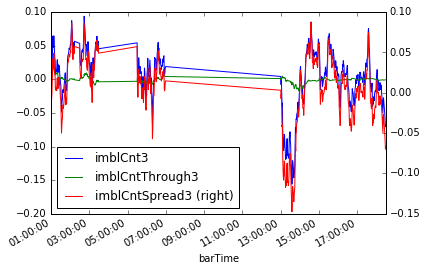

In [486]:
temp[["imblCnt3",'imblCntThrough3','imblCntSpread3']].plot(secondary_y=['imblCntSpread3'])

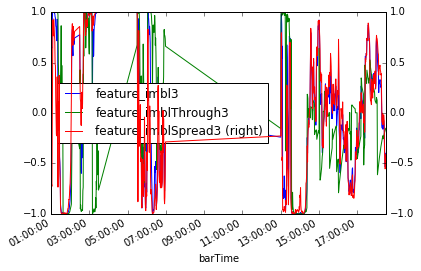

In [487]:
temp[["feature_imbl3",'feature_imblThrough3','feature_imblSpread3']].plot(secondary_y=['feature_imblSpread3'])

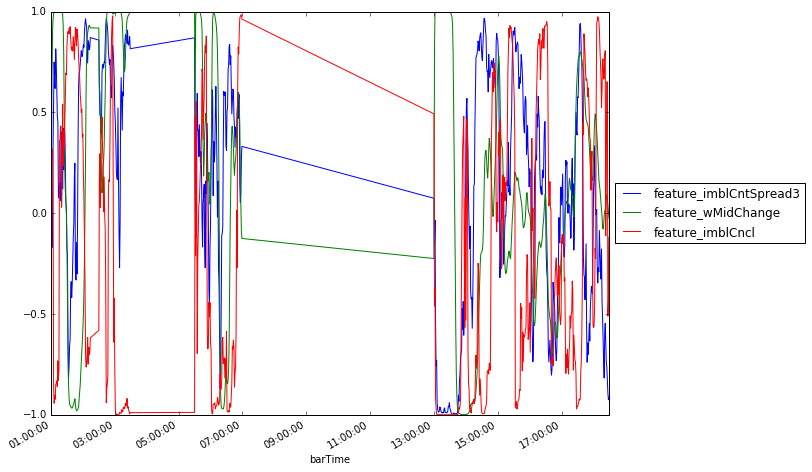

In [583]:
temp[['feature_imblCntSpread3','feature_wMidChange','feature_imblCncl']].plot(figsize=(10, 8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

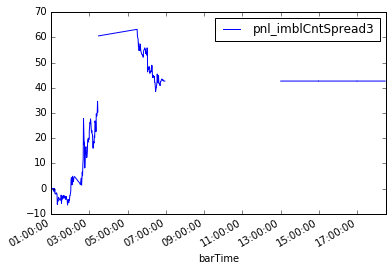

In [378]:
temp[['pnl_imblCntSpread3']].cumsum().plot()

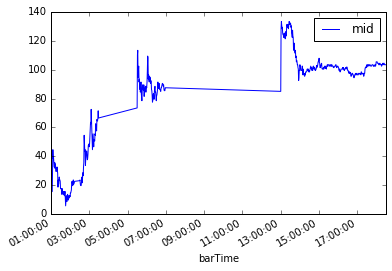

In [379]:
temp[['mid']].diff().cumsum().plot()

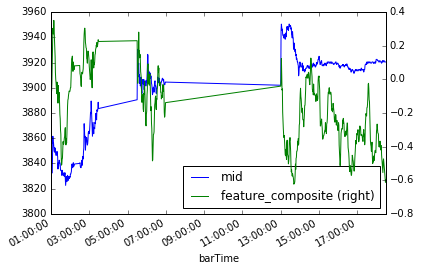

In [261]:
temp[['mid','feature_composite']].plot(secondary_y=['feature_composite'])

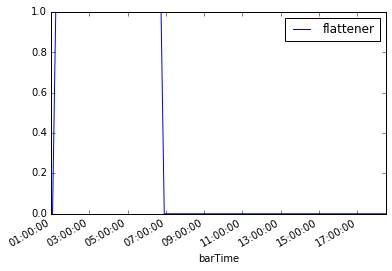

In [380]:
temp[['flattener']].plot()

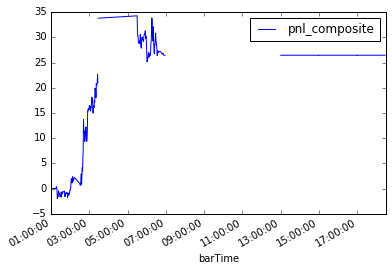

In [381]:
temp[['pnl_composite']].cumsum().plot()